<a href="https://colab.research.google.com/github/seriserendipia/Airbnb_LA_Price_Prediction/blob/main/Airbnb_LA_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
%%time
df = pd.read_csv('/content/drive/MyDrive/listings.csv')

CPU times: user 2.4 s, sys: 327 ms, total: 2.73 s
Wall time: 6.46 s


# Overview

In [ ]:
dict(df.iloc[0,:])

{'id': 150097.0,
 'listing_url': 'https://www.airbnb.com/rooms/150097',
 'scrape_id': 20230600000000.0,
 'last_scraped': '2023/6/7',
 'source': 'city scrape',
 'name': 'Bed and breakfast in North Hollywood ¬∑ ‚òÖ4.96 ¬∑ 1 bedroom ¬∑ 2 beds ¬∑ 1 private bath',
 'description': 'Welcome to our guest studio house! private entrance to 1 bedroom studio , queen size bed, futon bed, kitchenette, private bathroom, beautiful back yard with patio and everything you might need! It‚Äôs private and quiet-- we are just around the corner in the main house.  <br />The studio could accommodate up to 2 adults and two children<br />It‚Äôs a 10 minute drive to Harry Potter land at Universal studios!<br /><br /><b>The space</b><br />Gorgeous bright Suite with french door leading to open air patio and with garden views.<br />This is a private suite with private access. It is attached to the main house but secured.<br />Your retreat will have everything you need including;<br />‚Ä¢ Queen Bed<br />‚Ä¢ Futon be

In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df.shape

(44464, 75)

## (Sample Data)using a small  dataset



In [ ]:
# prompt: random use 10%of dataset

# import pandas as pd
# frac = 0.1
# df_sample = df.sample(frac=frac,random_state=0)
# df_sample.shape

In [ ]:
# df1 = df_sample.copy()

# using full dataset

In [ ]:
# re-check
# raise SystemExit(0)

In [ ]:
df1 = df.copy()

In [ ]:
# prompt: count_by_column(df1,'host_location') in percent

def count_by_column(df, column_name):
  """
  Groups a DataFrame by a specified column, counts occurrences, and returns percentages.

  Args:
    df: The input Pandas DataFrame.
    column_name: The name of the column to group by.

  Returns:
    A Pandas DataFrame with percentages of IDs for each group, sorted in descending order.
    Returns None if the column does not exist in the DataFrame.
  """
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' not found in DataFrame.")
    return None

  df_counts = df.groupby(column_name)['id'].count().reset_index()
  df_counts.rename(columns={'id': 'count'}, inplace=True)
  df_counts['percentage'] = (df_counts['count'] / df_counts['count'].sum()) * 100
  df_counts = df_counts.sort_values(by='count', ascending=False).reset_index(drop=True)
  return df_counts

# Drop Missing Value

In [ ]:
# prompt: pandas show a summary of the percentage of missing value in each column of df1, sort decedent, summary has title and column name

# Percentage of missing values in each column
missing_percentage = df1.isnull().sum() * 100 / len(df1)
missing_percentage_df = pd.DataFrame({'Column Name': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
missing_percentage_df = missing_percentage_df.sort_values(by='Missing Percentage', ascending=False)

In [ ]:
# prompt: missing_percentage_df >= 10%

missing_percentage_df[missing_percentage_df['Missing Percentage'] >= 10]

,Column Name,Missing Percentage
49,calendar_updated,100.000000
35,bathrooms,100.000000
68,license,78.438737
14,host_about,41.190626
7,neighborhood_overview,41.030946
27,neighbourhood,41.024199
37,bedrooms,33.177402
67,review_scores_value,29.106693
66,review_scores_location,29.102195
64,review_scores_checkin,29.097697


In [ ]:
list(missing_percentage_df[missing_percentage_df['Missing Percentage'] >= 10]["Column Name"])

['calendar_updated',
 'bathrooms',
 'license',
 'host_about',
 'neighborhood_overview',
 'neighbourhood',
 'bedrooms',
 'review_scores_value',
 'review_scores_location',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_communication',
 'first_review',
 'reviews_per_month',
 'last_review',
 'review_scores_rating',
 'host_is_superhost',
 'host_response_rate',
 'host_response_time',
 'host_acceptance_rate',
 'host_location',
 'host_neighbourhood']

### drop calendar_updated,bathrooms

In [ ]:
df1 = df1.drop(['calendar_updated', 'bathrooms'], axis=1)

In [ ]:
# prompt: # prompt: pandas show a summary of the percentage of missing value in each row of df1, sort decedent, summary has title and column name

# Percentage of missing values in each row
missing_percentage_row = df1.isnull().sum(axis=1) * 100 / len(df1.columns)
missing_percentage_row_df = pd.DataFrame({'Row Index': missing_percentage_row.index, 'Missing Percentage': missing_percentage_row.values})
missing_percentage_row_df = missing_percentage_row_df.sort_values(by='Missing Percentage', ascending=False)

print("Summary of Missing Value Percentage in Each Row")
missing_percentage_row_df

Summary of Missing Value Percentage in Each Row


,Row Index,Missing Percentage
3867,3867,35.616438
2747,2747,35.616438
17246,17246,31.506849
16973,16973,31.506849
15420,15420,31.506849
...,...,...
5849,5849,0.000000
26870,26870,0.000000
26877,26877,0.000000
26817,26817,0.000000


In [ ]:
missing_percentage_row_df[missing_percentage_row_df['Missing Percentage'] >= 20]

,Row Index,Missing Percentage
3867,3867,35.616438
2747,2747,35.616438
17246,17246,31.506849
16973,16973,31.506849
15420,15420,31.506849
...,...,...
44250,44250,20.547945
17540,17540,20.547945
17223,17223,20.547945
17216,17216,20.547945


### drop license

In [ ]:
count_by_column(df1, 'license')

,license,count,percentage
0,Exempt - This listing is a transient occupancy...,838,8.741003
1,Exempt - This listing is a hotel or motel,584,6.091582
2,Exempt,468,4.881611
3,Exempt - This listing is a bed and breakfast,308,3.212684
4,HSR19-004485,26,0.271201
...,...,...,...
6278,HSR21-000613,1,0.010431
6279,HSR21-000612,1,0.010431
6280,HSR21-000607,1,0.010431
6281,HSR21-000604,1,0.010431


In [ ]:
# prompt: drop license
df1 = df1.drop(['license'], axis=1)

In [ ]:
# prompt: column price nan

# Check for NaN values in the 'price' column
nan_count = df1['price'].isna().sum()
print(f"Number of NaN values in 'price' column: {nan_count}")

Number of NaN values in 'price' column: 0


# Feature engineering

### transform price to numeric format and log

In [ ]:
# prompt: encode price from '$80.00 ' to 80


# Assuming 'price' column exists in your DataFrame df1
# Example:
# df1['price'] = ['$80.00 ', '$100.00', '$50.00']

def clean_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.strip().replace(',', '')  # Remove leading/trailing spaces
        if price_str.startswith('$'):
            try:
                return float(price_str[1:])  # Convert to float, removing the '$'
            except ValueError:
                print(price_str)
                return 0  # Handle cases where conversion to float fails
        return 0 #Handle cases where the string doesn't start with '$'
    elif pd.isna(price_str):
        print(price_str)
        return 0 # Handle NaN values
    else:
      try:
        return float(price_str)
      except:
        print(price_str)
        return 0


df1['price($)'] = df1['price'].apply(clean_price)
print(df1[['price', 'price($)']].head())

      price  price($)
0   $80.00       80.0
1   $59.00       59.0
2  $129.00      129.0
3  $132.00      132.0
4   $47.00       47.0


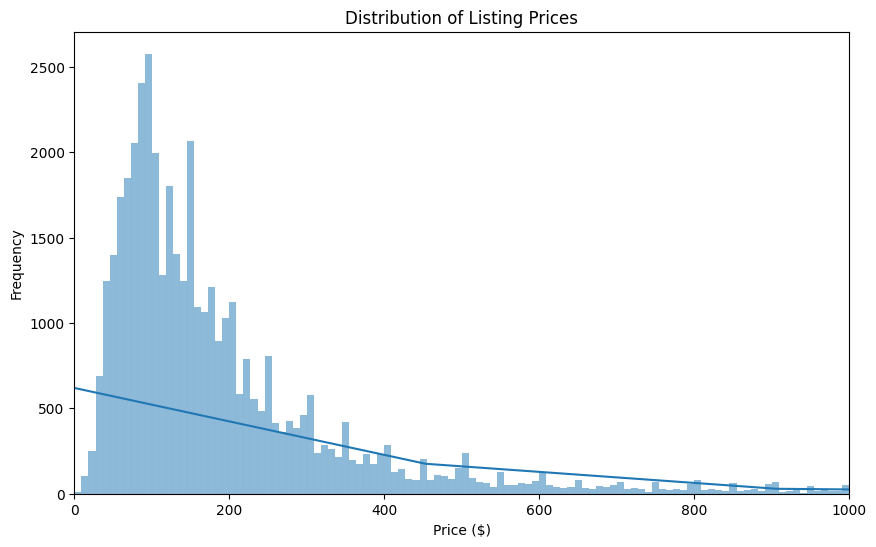

In [ ]:
# prompt: price distribution polt

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'price($)' column is already created and cleaned as in your previous code

# Create the price distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df1['price($)'], kde=True)
plt.title('Distribution of Listing Prices')
plt.xlim(0, 1000)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

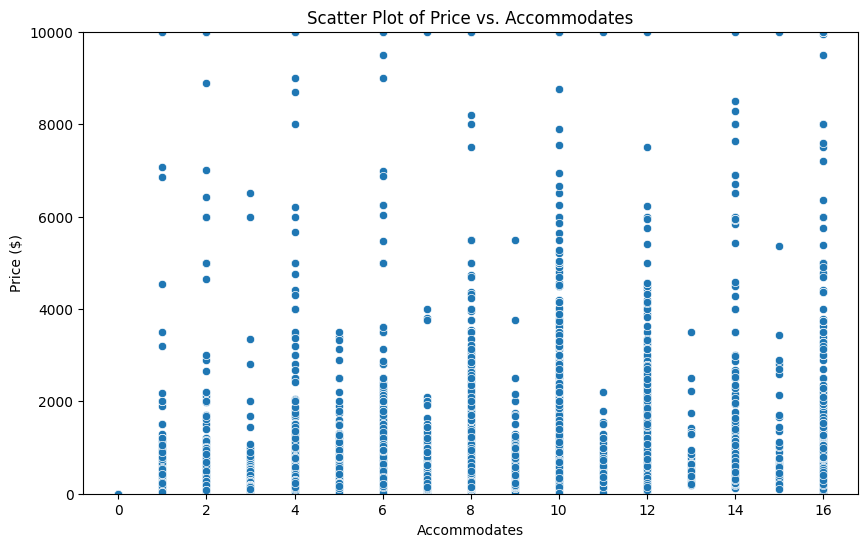

In [ ]:
# prompt: df1  scatter y = price x=accmmodates

plt.figure(figsize=(10,6))
sns.scatterplot(x='accommodates', y='price($)', data=df1)
plt.title('Scatter Plot of Price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price ($)')
plt.ylim(0, 10000)
plt.show()

In [ ]:
# prompt: calculate satistical value of price like zscore skewness  etc. suggest how to normalize it

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew

price_stats = df1['price($)'].describe()
zscores = zscore(df1['price($)'])
skewness = skew(df1['price($)'])

print("Descriptive Statistics for Price:")
print(price_stats)
print(f"\nSkewness of Price: {skewness}")

# Identify outliers based on z-score (e.g., values beyond 3 standard deviations)
outliers = df1[abs(zscores) > 3]
print("\nNumber of outliers:", len(outliers))


Descriptive Statistics for Price:
count    44464.000000
mean       279.030969
std        880.129338
min          0.000000
25%         89.000000
50%        148.000000
75%        250.000000
max      90150.000000
Name: price($), dtype: float64

Skewness of Price: 52.77914751309933

Number of outliers: 360


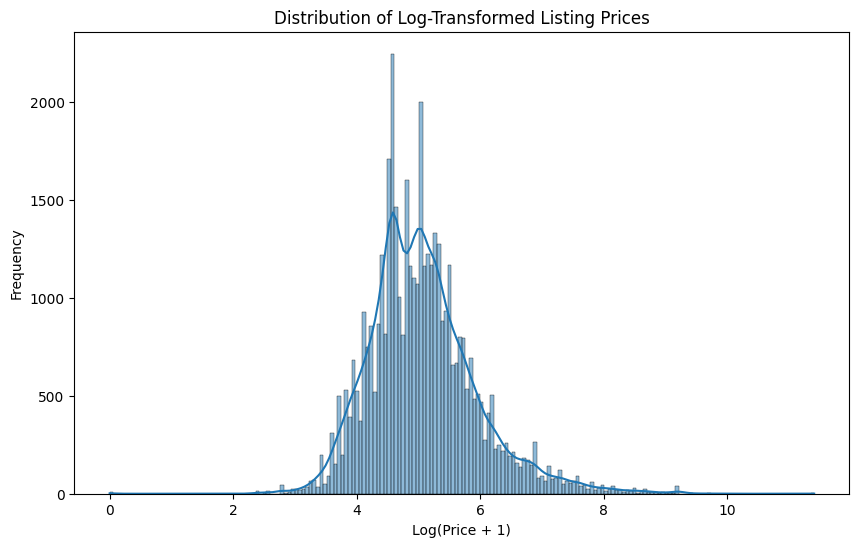

Descriptive Statistics for Log-Transformed Price:
count    44464.000000
mean         5.073157
std          0.881858
min          0.000000
25%          4.499810
50%          5.003946
75%          5.525453
max         11.409241
Name: log_price, dtype: float64

Skewness of Log-Transformed Price: 0.8753235487215928

Number of outliers: 536


In [ ]:
# prompt: apply Log Transformation to price

import numpy as np

# Assuming df1 and the 'price($)' column are already defined as in your previous code

# Apply log transformation to the 'price($)' column
df1['log_price'] = np.log1p(df1['price($)'])

# Create the log-transformed price distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df1['log_price'], kde=True)
plt.title('Distribution of Log-Transformed Listing Prices')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

price_stats = df1['log_price'].describe()
zscores = zscore(df1['log_price'])
skewness = skew(df1['log_price'])

print("Descriptive Statistics for Log-Transformed Price:")
print(price_stats)
print(f"\nSkewness of Log-Transformed Price: {skewness}")

# Identify outliers based on z-score (e.g., values beyond 3 standard deviations)
outliers = df1[abs(zscores) > 3]
print("\nNumber of outliers:", len(outliers))


In [ ]:
df1 = df1.drop(['price'], axis=1)

### trim all text data

In [ ]:
# prompt: trim all data in df1

df1 = df1.applymap(lambda x: x.strip() if isinstance(x, str) else x).copy()

<ipython-input-27-793ff405d563>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: x.strip() if isinstance(x, str) else x).copy()


### encode source

In [ ]:
# prompt: df source count value

df_source_count = df1.groupby('source')['id'].count().reset_index()
df_source_count.rename(columns={'id':'count'}, inplace=True)
df_source_count = df_source_count.sort_values(by = 'count', ascending = False).reset_index(drop = True)
df_source_count.head()

,source,count
0,city scrape,36843
1,previous scrape,7621


In [ ]:
# prompt: df source count  encode

from sklearn.preprocessing import LabelEncoder

# Assuming df_source_count is already created as in the previous code

le = LabelEncoder()
df1['source'] = le.fit_transform(df1['source'])
df1.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price($),log_price
0,150097.0,https://www.airbnb.com/rooms/150097,2.023060e+13,2023/6/7,0,Bed and breakfast in North Hollywood ¬∑ ‚òÖ4.9...,Welcome to our guest studio house! private ent...,The house is located in a quiet residential ne...,https://a0.muscache.com/pictures/6793974d-9fb2...,647546,...,4.90,4.95,f,4,1,3,0,1.67,80.0,4.394449
1,40667.0,https://www.airbnb.com/rooms/40667,2.023060e+13,2023/6/7,0,Rental unit in Los Angeles ¬∑ ‚òÖ4.30 ¬∑ 1 bed...,"<b>The space</b><br />Nice, quiet master bedr...",NaN,https://a0.muscache.com/pictures/70033015/cb7f...,175264,...,4.36,4.45,f,1,0,1,0,0.08,59.0,4.094345
2,109.0,https://www.airbnb.com/rooms/109,2.023060e+13,2023/6/7,0,Condo in Culver City ¬∑ 2 bedrooms ¬∑ 2 beds ¬...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,...,5.00,4.00,f,1,1,0,0,0.01,129.0,4.867534
3,152514.0,https://www.airbnb.com/rooms/152514,2.023060e+13,2023/6/7,0,Guesthouse in Manhattan Beach ¬∑ 1 bedroom ¬∑ ...,Wake up to the sound of waves crashing on the ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,733870,...,5.00,4.00,f,2,2,0,0,0.01,132.0,4.890349
4,43318.0,https://www.airbnb.com/rooms/43318,2.023060e+13,2023/6/7,0,Hostel in Los Angeles ¬∑ ‚òÖ4.37 ¬∑ 1 bedroom ...,Best value in most exciting part of DTLA! Wal...,Little Tokyo is the most vibrant area of downt...,https://a0.muscache.com/pictures/938a66db-d66b...,156094545,...,4.68,4.53,f,14,0,14,0,0.72,47.0,3.871201


### encode bathroom

In [ ]:
import re

def extract_number(text):
    if pd.isna(text):
        return 0
    match = re.search(r"(\d+(?:\.\d+)?)", str(text))
    if match:
        return float(match.group(1))
    return 0

df1['bathrooms_number'] = df1['bathrooms_text'].apply(extract_number)

### encode host_location

In [ ]:
count_by_column(df1, 'host_location')

,host_location,count,percentage
0,"Los Angeles, CA",20032,56.762347
1,"California, United States",1049,2.972429
2,"New York, NY",967,2.740075
3,"Long Beach, CA",933,2.643734
4,"Santa Monica, CA",890,2.521889
...,...,...,...
798,"Addis Ababa, Ethiopia",1,0.002834
799,"Winter Park, FL",1,0.002834
800,"Worcester, MA",1,0.002834
801,"Wuhan, China",1,0.002834


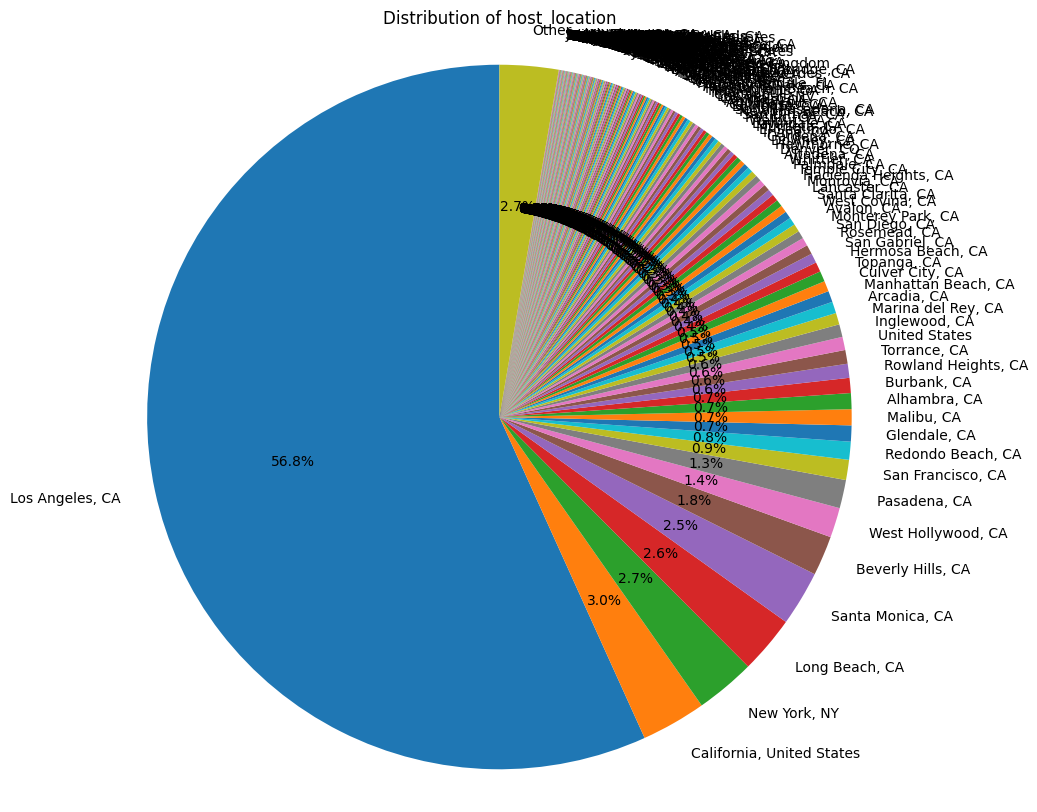

In [ ]:
# prompt: pie plot count_by_column(df1, 'host_location')

import matplotlib.pyplot as plt

def pie_plot_count_by_column(df, column_name):
    """
    Generates a pie plot of the counts for a specified column in a DataFrame.

    Args:
        df: The input Pandas DataFrame.
        column_name: The name of the column to group by.
    """
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in DataFrame.")
        return

    df_counts = count_by_column(df, column_name)
    if df_counts is None:
        return

    # Prepare data for plotting, considering a limit for labels
    labels = df_counts[column_name]
    sizes = df_counts['count']

    #Adjust the threshold to control the number of labels shown
    threshold = 5
    other_size = 0
    other_labels = []
    new_labels = []
    new_sizes = []


    for i in range(len(labels)):
      if sizes[i] >= threshold:
          new_labels.append(labels[i])
          new_sizes.append(sizes[i])
      else:
          other_size = other_size + sizes[i]

    if other_size > 0:
        new_labels.append('Other')
        new_sizes.append(other_size)

    # Create the pie plot
    plt.figure(figsize=(10, 10))  # Adjust figure size as needed
    plt.pie(new_sizes, labels=new_labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {column_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

pie_plot_count_by_column(df1, 'host_location')

In [ ]:
# prompt: encode host_location as wether or not == “Los Angeles, CA”

df1['host_location'] = df1['host_location'].apply(lambda x: 1 if x == 'Los Angeles, CA' else 0)

### encode host_response_time

In [ ]:
count_by_column(df1, 'host_response_time')

,host_response_time,count,percentage
0,within an hour,25894,75.079011
1,within a few hours,5697,16.518310
2,within a day,2233,6.474528
3,a few days or more,665,1.928151


In [ ]:
# prompt: encode host_response_time

# Assuming df1 and count_by_column function are already defined as in the previous code

# Encode 'host_response_time'
df1['host_response_time_encoded'] = le.fit_transform(df1['host_response_time'])

In [ ]:
df1[['host_response_time','host_response_time_encoded']].value_counts()

,,count
host_response_time,host_response_time_encoded,
within an hour,3,25894
within a few hours,2,5697
within a day,1,2233
a few days or more,0,665


In [ ]:
# prompt: drop df1['host_response_time']

# Drop the 'host_response_time' column
df1 = df1.drop('host_response_time', axis=1)

### datetime host_since ,'last_scraped','first_review','last_review',calendar_last_scraped

In [ ]:
df1['host_since'] = pd.to_datetime(df1['host_since'])


In [ ]:
df1['last_scraped'] = pd.to_datetime(df1['last_scraped'])


In [ ]:
# prompt: calculate the difference of days between last_scraped and host_since

# Assuming df1 and necessary libraries are already imported and defined as in the provided code.

# Calculate the difference in days between 'last_scraped' and 'host_since'
df1['days_since_host'] = (df1['last_scraped'] - df1['host_since']).dt.days

# Print the first few rows to check the result
print(df1[['last_scraped', 'host_since', 'days_since_host']].head())

  last_scraped host_since  days_since_host
0   2023-06-07 2011-05-31           4390.0
1   2023-06-07 2010-07-20           4705.0
2   2023-06-07 2008-06-27           5458.0
3   2023-06-07 2011-06-23           4367.0
4   2023-06-07 2017-10-24           2052.0


In [ ]:
df1['first_review'] = pd.to_datetime(df1['first_review'])
df1['last_review'] = pd.to_datetime(df1['last_review'])
df1['calendar_last_scraped'] = pd.to_datetime(df1['calendar_last_scraped'])

### transform 'host_response_rate', 'host_acceptance_rate' to decimal

In [ ]:
# prompt: transform 'host_response_rate', 'host_acceptance_rate' from "100%" to 100

# ... (Your existing code)

# ### transform 'host_response_rate', 'host_acceptance_rate' to decimal
def transform_percentage(rate):
    if isinstance(rate, str) and rate.endswith('%'):
        try:
            return float(rate[:-1])
        except ValueError:
            return None  # Handle cases with invalid percentage values
    elif pd.isna(rate):
        return None #Handle NaN values
    else:
        return rate

df1['host_response_rate(%)'] = df1['host_response_rate'].apply(transform_percentage)
df1['host_acceptance_rate(%)'] = df1['host_acceptance_rate'].apply(transform_percentage)

print(df1[['host_response_rate', 'host_acceptance_rate', 'host_response_rate(%)', 'host_acceptance_rate(%)']].head())

df1.drop(['host_response_rate', 'host_acceptance_rate'], axis=1, inplace=True)

  host_response_rate host_acceptance_rate  host_response_rate(%)  \
0               100%                 100%                  100.0   
1               100%                  17%                  100.0   
2               100%                   0%                  100.0   
3               100%                  99%                  100.0   
4                NaN                  NaN                    NaN   

   host_acceptance_rate(%)  
0                    100.0  
1                     17.0  
2                      0.0  
3                     99.0  
4                      NaN  


### one-hot encode 'neighbourhood_group_cleansed'

In [ ]:
count_by_column(df1, 'neighbourhood_group_cleansed')

,neighbourhood_group_cleansed,count,percentage
0,City of Los Angeles,23240,52.267003
1,Other Cities,17182,38.642497
2,Unincorporated Areas,4042,9.090500


In [ ]:
# prompt: one-hot encode 'neighbourhood_group_cleansed'

# Create dummy variables for 'neighbourhood_group_cleansed'
neighbourhood_dummies = pd.get_dummies(df1['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed')

# Concatenate the dummy variables with the original DataFrame
df1 = pd.concat([df1, neighbourhood_dummies], axis=1)

# Drop the original 'neighbourhood_group_cleansed' column
df1 = df1.drop('neighbourhood_group_cleansed', axis=1)

### encode host_is_superhost host_has_profile_pic host_identity_verified

In [ ]:
count_by_column(df1, 'host_is_superhost')

,host_is_superhost,count,percentage
0,f,22009,67.547494
1,t,10574,32.452506


In [ ]:
# prompt: encode host_is_superhost host_has_profile_pic  host_identity_verified

# Assuming df1 and le (LabelEncoder) are already defined as in the previous code

# Encode 'host_is_superhost'
df1['host_is_superhost'] = le.fit_transform(df1['host_is_superhost'])

# Encode 'host_has_profile_pic'
df1['host_has_profile_pic'] = le.fit_transform(df1['host_has_profile_pic'])

# Encode 'host_identity_verified'
df1['host_identity_verified'] = le.fit_transform(df1['host_identity_verified'])

In [ ]:
count_by_column(df1, 'host_verifications')

,host_verifications,count,percentage
0,"['email', 'phone']",34803,78.275831
1,"['email', 'phone', 'work_email']",5577,12.543295
2,['phone'],3763,8.463407
3,"['phone', 'work_email']",258,0.580271
4,['email'],50,0.112456
5,[],10,0.022491
6,['work_email'],1,0.002249


In [ ]:
# prompt: transform df1 column host_verifications
# if contains 'email' new col host_is_email_aerified =1,else 0
# also 'phone','work_email'

# Assuming df1 is already defined as in the provided code

def transform_host_verifications(df):
    """Transforms the 'host_verifications' column and adds new verification columns."""

    verification_types = ['email', 'phone', 'work_email']
    for verification in verification_types:
        df[f'host_is_{verification}_verified'] = df['host_verifications'].astype(str).apply(
            lambda x: 1 if verification in x else 0
        )
    return df

df1 = transform_host_verifications(df1)

In [ ]:
df1["host_verifications"].head()

,host_verifications
0,"['email', 'phone']"
1,"['email', 'phone']"
2,"['email', 'phone']"
3,"['email', 'phone']"
4,"['email', 'phone']"


In [ ]:
# prompt: display df[f'host_is_{verification}_verified'] head

# Assuming df1 and the transform_host_verifications function are already defined
# as in the provided code.

verification_types = ['email', 'phone', 'work_email']

df1[[f'host_is_{verification}_verified' for verification in verification_types]].head()

,host_is_email_verified,host_is_phone_verified,host_is_work_email_verified
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:
# prompt: drop df1["host_verifications"]

# Assuming df1 is already defined as in the provided code.

df1 = df1.drop('host_verifications', axis=1)

### encode property_type

In [ ]:
count_by_column(df1, 'property_type').head(20)

,property_type,count,percentage
0,Entire rental unit,10985,24.705380
1,Entire home,10318,23.205290
2,Private room in home,7388,16.615689
3,Entire guesthouse,2428,5.460597
4,Private room in rental unit,2231,5.017542
5,Entire condo,1889,4.248381
6,Entire guest suite,1309,2.943955
7,Entire villa,792,1.781216
8,Entire townhouse,772,1.736236
9,Entire bungalow,615,1.383141


In [ ]:
# prompt: encode property_type into 4 category 'Entire rental unit', 'Entire home', 'Private room in home' and 'else'

# Assuming df1 is already defined as in the provided code.

def categorize_property_type(property_type):
  property_type = property_type.lower()
  if 'rental unit' in property_type:
    return 'rental unit'
  elif 'condo' in property_type:
    return 'condo'
  elif 'guesthouse' in property_type:
    return 'guesthouse'
  elif 'guest suite' in property_type:
    return 'guest suite'
  elif 'home' in property_type:
    return 'home'
  elif 'hotel' in property_type:
    return 'hotel'
  elif 'bungalow' in property_type:
    return 'bungalow'
  elif 'villa' in property_type:
    return 'villa'
  elif 'townhouse' in property_type:
    return 'townhouse'
  elif 'loft' in property_type:
    return 'loft'
  elif 'serviced apartment' in property_type:
    return 'serviced apartment'
  else:
    return 'other'


df1['property_type_category'] = df1['property_type'].apply(categorize_property_type)

In [ ]:
def categorize_property_type_is_shared(property_type):
    property_type = property_type.lower()
    if 'shared' in property_type:
      return 'shared'
    elif 'private' in property_type:
      return 'private'
    elif 'room' in property_type:
      return "room"
    elif 'entire' in property_type:
        return "entire"
    else:
        return "not_mentioned"

df1['property_type_is_shared'] = df1['property_type'].apply(categorize_property_type_is_shared)

In [ ]:
# prompt: one-hot encode property_type_category and show head,drop original column

# Create dummy variables for 'property_type_category'
property_type_dummies = pd.get_dummies(df1['property_type_category'], prefix='property_type')
property_type_is_shared_dummies = pd.get_dummies(df1['property_type_is_shared'], prefix='property_type_is_shared')

# Concatenate the dummy variables with the original DataFrame
df1 = pd.concat([df1, property_type_dummies], axis=1)
df1 = pd.concat([df1, property_type_is_shared_dummies], axis=1)

property_type_cols = ['property_type', 'property_type_category']
property_type_cols.extend(property_type_dummies.columns)
property_type_cols.extend(property_type_is_shared_dummies.columns)

df1[property_type_cols].head()

,property_type,property_type_category,property_type_bungalow,property_type_condo,property_type_guest suite,property_type_guesthouse,property_type_home,property_type_hotel,property_type_loft,property_type_other,property_type_rental unit,property_type_serviced apartment,property_type_townhouse,property_type_villa,property_type_is_shared_entire,property_type_is_shared_not_mentioned,property_type_is_shared_private,property_type_is_shared_room,property_type_is_shared_shared
0,Private room in bed and breakfast,other,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,Private room in rental unit,rental unit,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
2,Entire condo,condo,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,Entire guesthouse,guesthouse,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
4,Private room in hostel,other,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False


In [ ]:
# Drop the original 'property_type_category' column
df1 = df1.drop(['property_type_category','property_type','property_type_is_shared'], axis=1)

### encode room_type

In [ ]:
count_by_column(df1, 'room_type')

,room_type,count,percentage
0,Entire home/apt,31023,69.771051
1,Private room,12623,28.389259
2,Shared room,740,1.664268
3,Hotel room,78,0.175423


In [ ]:
# prompt: one-hot encode encode room_type

# Assuming df1 and le (LabelEncoder) are already defined as in the previous code

# One-hot encode 'room_type'
room_type_dummies = pd.get_dummies(df1['room_type'], prefix='room_type')

# Concatenate the dummy variables with the original DataFrame
df1 = pd.concat([df1, room_type_dummies], axis=1)

# Drop the original 'room_type' column
df1 = df1.drop('room_type', axis=1)

In [ ]:
room_type_dummies.columns

Index(['room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

### encode has_acilibility,instant_bookable

In [ ]:
# prompt: encode has_acilibility,instant_bookable

# Assuming df1 and le (LabelEncoder) are already defined as in the previous code

# Encode 'has_availability'
df1['has_availability'] = le.fit_transform(df1['has_availability'])

# Encode 'instant_bookable'
df1['instant_bookable'] = le.fit_transform(df1['instant_bookable'])

### frequence encode neighbourhood

In [ ]:
# prompt: frequence encode neighbourhood

# Assuming df1 and necessary libraries are already imported and defined as in the provided code.

# Frequency encode 'neighbourhood'
neighbourhood_counts = df1['neighbourhood'].value_counts(normalize=True)
df1['neighbourhood_freq_encoded'] = df1['neighbourhood'].map(neighbourhood_counts)

In [ ]:
count_by_column(df1, 'neighbourhood')

,neighbourhood,count,percentage
0,"Los Angeles, California, United States",13994,53.365366
1,"Long Beach, California, United States",1130,4.309194
2,"West Hollywood, California, United States",757,2.886779
3,"Santa Monica, California, United States",665,2.535942
4,"Beverly Hills, California, United States",553,2.108836
...,...,...,...
291,"Beverly Hills , California, United States",1,0.003813
292,"Beverly Hills/ Los Angeles, California, United...",1,0.003813
293,"Bixby Knolls , California, United States",1,0.003813
294,"Venice Beach, Los Angeles, California, United ...",1,0.003813


In [ ]:
# # prompt: one-hot ecode neighbourhood

# # One-hot encode 'neighbourhood'
# neighbourhood_dummies = pd.get_dummies(df1['neighbourhood'], prefix='neighbourhood')
# df1 = pd.concat([df1, neighbourhood_dummies], axis=1)
# # df1 = df1.drop('neighbourhood', axis=1)

In [ ]:
# prompt: frequence ecode neighbourhood_cleansed

# Assuming df1 and necessary libraries are already imported and defined as in the provided code.

# Frequency encode 'neighbourhood_cleansed'
neighbourhood_cleansed_counts = df1['neighbourhood_cleansed'].value_counts(normalize=True)
df1['neighbourhood_cleansed_freq_encoded'] = df1['neighbourhood_cleansed'].map(neighbourhood_cleansed_counts)

# Display the frequency encoding
print(df1[['neighbourhood_cleansed', 'neighbourhood_cleansed_freq_encoded']].head())

  neighbourhood_cleansed  neighbourhood_cleansed_freq_encoded
0            Valley Glen                             0.004880
1               Mid-City                             0.010211
2            Culver City                             0.011492
3        Manhattan Beach                             0.007377
4               Downtown                             0.027595


### encode amenities

In [ ]:
# prompt: function count the items in amenities_string apply to df1["amenities_string"]

import pandas as pd

def count_amenities(amenities_string):
    """Counts the number of amenities in a given string.

    Args:
        amenities_string: A string representing a list of amenities.

    Returns:
        The number of amenities in the string.
    """
    if pd.isna(amenities_string) or amenities_string == '{}':  # Handle empty or NaN values
      return 0
    try:
        amenities_list = amenities_string.strip('{}').split(',')
        return len(amenities_list)
    except AttributeError:  # Handle cases where the input is not a string
      return 0


# Assuming df1 and the 'amenities' column are already defined as in your provided code.

# Apply the function to the 'amenities' column
df1['amenities_count'] = df1['amenities'].apply(count_amenities)

# Display the first few rows to check the result
print(df1[['amenities', 'amenities_count']].head())

                                           amenities  amenities_count
0  ["Private pool", "Smoke alarm", "Garden view",...               41
1  ["Smoke alarm", "Hot water", "Free street park...               23
2  ["Smoke alarm", "Garden view", "Pool view", "R...               31
3  ["Lockbox", "Smoke alarm", "Toaster", "Hot wat...               50
4  ["Lockbox", "Smoke alarm", "Hot water", "Free ...               28


In [ ]:
def count_amenities(amenities_string):
    """Counts the number of amenities in a string representation of a list."""
    amenities_list = amenities_string.strip('{[]}').split(',')
    amenities_count = {}
    for amenity in amenities_list:
        amenity = amenity.strip().strip('"')
        amenities_count[amenity] = amenities_count.get(amenity, 0) + 1
    return amenities_count

In [ ]:
import pandas as pd

# Assuming df1 and count_amenities function are defined as in your original code

# ... (your existing code)

amenities_counts_all = {}
for amenities_string in df1['amenities']:
    counts = count_amenities(amenities_string)
    if counts:
        for amenity, count in counts.items():
            amenities_counts_all[amenity] = amenities_counts_all.get(amenity, 0) + count

# Convert the amenities_counts_all dictionary to a DataFrame for easy sorting
amenities_df = pd.DataFrame.from_dict(amenities_counts_all, orient='index', columns=['count'])
amenities_df = amenities_df.sort_values(by='count', ascending=False)

# Print the sorted amenities and their counts
amenities_df

,count
Smoke alarm,41904
Wifi,40748
Kitchen,39507
Essentials,38112
Carbon monoxide alarm,37950
...,...
Maytag stainless steel gas stove,1
A variety of brands conditioner,1
Haier/Samsun stainless steel oven,1
"\"" red frig \"" GALANZ refrigerator",1


In [ ]:

total_arbnb_count = df1.shape[0]

# Calculate the percentage of each amenity count
amenities_df['has_X_amenities(%)'] = amenities_df['count'] / total_arbnb_count * 100

# Print the updated DataFrame
amenities_df

,count,has_X_amenities(%)
Smoke alarm,41904,94.242533
Wifi,40748,91.642677
Kitchen,39507,88.851655
Essentials,38112,85.714286
Carbon monoxide alarm,37950,85.349946
...,...,...
Maytag stainless steel gas stove,1,0.002249
A variety of brands conditioner,1,0.002249
Haier/Samsun stainless steel oven,1,0.002249
"\"" red frig \"" GALANZ refrigerator",1,0.002249


In [ ]:
# prompt: amenities_df >10%

# Filter amenities with a percentage greater than 10%
amenities_over_10_percent = amenities_df[amenities_df['has_X_amenities(%)'] > 10]

# Print the filtered DataFrame
amenities_over_10_percent

,count,has_X_amenities(%)
Smoke alarm,41904,94.242533
Wifi,40748,91.642677
Kitchen,39507,88.851655
Essentials,38112,85.714286
Carbon monoxide alarm,37950,85.349946
...,...,...
Mini fridge,4983,11.206819
Clothing storage,4738,10.655811
Board games,4641,10.437657
Clothing storage: closet,4599,10.343199


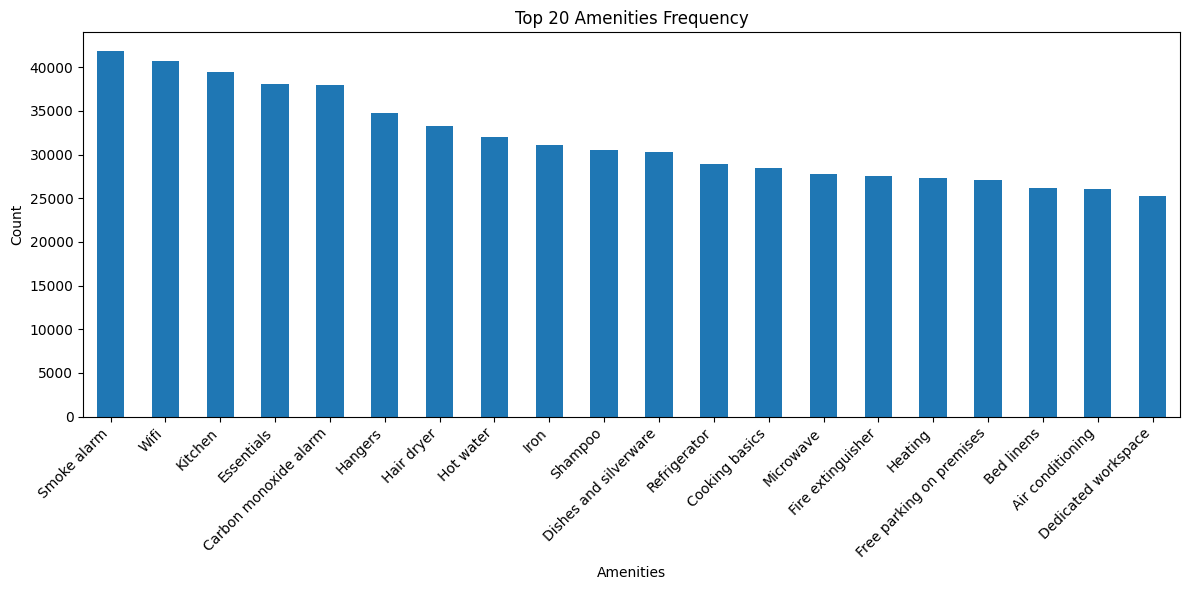

In [ ]:
# prompt: amenities_df Bar PLOT

# Assuming amenities_df is already created as in the provided code.

plt.figure(figsize=(12, 6))
amenities_df["count"].head(20).plot(kind='bar')  # Plot the top 20 amenities
plt.title('Top 20 Amenities Frequency')
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### extract amenities using machine learning

### characters_count from text

In [ ]:
# prompt: df1 new column characters_count seperately in df1 host_about neighborhood_overview description

# Assuming df1 is already defined and contains columns 'host_about', 'neighborhood_overview', and 'description'.

def count_characters(text):
    """Counts the number of characters in a text string, handling missing values."""
    if pd.isna(text):
        return 0
    elif isinstance(text, str):
        return len(text)
    else:
        return 0

# Apply the function to each text column and create new columns with character counts
df1['host_about_characters_count'] = df1['host_about'].apply(count_characters)
df1['neighborhood_overview_characters_count'] = df1['neighborhood_overview'].apply(count_characters)
df1['description_characters_count'] = df1['description'].apply(count_characters)

# Display the first few rows with the new columns to verify
print(df1[['host_about', 'host_about_characters_count', 'neighborhood_overview', 'neighborhood_overview_characters_count', 'description', 'description_characters_count']].head())

                                          host_about  \
0  Hey, I'm Marco!\r\n\r\nWelcome, your comfort a...   
1  I am a British DJ and photographer working in ...   
2  Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...   
3  Summers in Manhattan Beach, CA, winters in For...   
4                                                NaN   

   host_about_characters_count  \
0                          472   
1                          365   
2                         1294   
3                          105   
4                            0   

                               neighborhood_overview  \
0  The house is located in a quiet residential ne...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Little Tokyo is the most vibrant area of downt...   

   neighborhood_overview_characters_count  \
0                                     269   
1                              

### frequence encode Host Neighbourhood

In [ ]:
# prompt: frequence encode Host Neighbourhood

# Assuming df1 is already defined as in the provided code.

# Frequency encode 'host_neighbourhood'
host_neighbourhood_counts = df1['host_neighbourhood'].value_counts(normalize=True)
df1['host_neighbourhood_freq_encoded'] = df1['host_neighbourhood'].map(host_neighbourhood_counts)

# Display the frequency encoding
print(df1[['host_neighbourhood', 'host_neighbourhood_freq_encoded']].head())

  host_neighbourhood  host_neighbourhood_freq_encoded
0        Valley Glen                         0.002124
1    South Robertson                         0.004730
2        Culver City                         0.004673
3    Manhattan Beach                         0.003625
4                NaN                              NaN


In [ ]:
# # prompt: show bedrooms  >10 df1

# # Assuming df1 is already defined and loaded as a pandas DataFrame.

# # Display rows where the 'bedrooms' column is greater than 10.
# df1[df1['bedrooms'] > 10]

In [ ]:
# # prompt: pd to excel df1[df1['bedrooms'] > 10]

# # Assuming df1 is already defined and loaded as a pandas DataFrame.

# # Display rows where the 'bedrooms' column is greater than 10.
# df1[df1['bedrooms'] > 10]

# #To save this to excel
# df1[df1['bedrooms'] > 10].to_excel("output.xlsx")

### columns to drop

In [ ]:
col_to_drop = [
    # 'price($)',
    'id', 'listing_url', 'scrape_id', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name',
        'host_about',
               'amenities' ,
               'host_since','last_scraped',  #datetime data
      #  'host_is_superhost',
 'host_thumbnail_url', 'host_picture_url',

       'host_neighbourhood',
#  'host_listings_count','host_total_listings_count',
#  'host_verifications',
      #  'host_has_profile_pic', 'host_identity_verified',
        'neighbourhood',
               'neighbourhood_cleansed',  # the location
  'latitude',
       'longitude',
  # 'property_type',
#  'room_type',
#  'accommodates',
#  'bathrooms',
       'bathrooms_text',
#  'bedrooms', 'beds',
#  'amenities', 'price',
      #  'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
      #  'maximum_minimum_nights', 'minimum_maximum_nights',
      #  'maximum_maximum_nights', 'minimum_nights_avg_ntm',
      #  'maximum_nights_avg_ntm',
#  'calendar_updated',
              #  'has_availability',
      #  'availability_30', 'availability_60', 'availability_90',
      #  'availability_365',
               'calendar_last_scraped',
              #  'number_of_reviews',
      #  'number_of_reviews_ltm', 'number_of_reviews_l30d',
               'first_review','last_review',
              #  'review_scores_rating', 'review_scores_accuracy',
      #  'review_scores_cleanliness', 'review_scores_checkin',
      #  'review_scores_communication', 'review_scores_location',
      #  'review_scores_value',
  # 'license',
#  'instant_bookable',
      #  'calculated_host_listings_count',
      #  'calculated_host_listings_count_entire_homes',
      #  'calculated_host_listings_count_private_rooms',
      #  'calculated_host_listings_count_shared_rooms', 'reviews_per_month'
       ]

In [ ]:
df1 = df1.drop(col_to_drop, axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44464 entries, 0 to 44463
Data columns (total 80 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   source                                             44464 non-null  int64  
 1   host_location                                      44464 non-null  int64  
 2   host_is_superhost                                  44464 non-null  int64  
 3   host_listings_count                                44462 non-null  float64
 4   host_total_listings_count                          44462 non-null  float64
 5   host_has_profile_pic                               44464 non-null  int64  
 6   host_identity_verified                             44464 non-null  int64  
 7   accommodates                                       44464 non-null  int64  
 8   bedrooms                                           29712 non-null  float64
 9   beds  

In [ ]:
df1.describe()

,source,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,...,host_is_email_verified,host_is_phone_verified,host_is_work_email_verified,neighbourhood_freq_encoded,neighbourhood_cleansed_freq_encoded,amenities_count,host_about_characters_count,neighborhood_overview_characters_count,description_characters_count,host_neighbourhood_freq_encoded
count,44464.000000,44464.000000,44464.000000,44462.000000,44462.000000,44464.000000,44464.000000,44464.000000,29712.000000,43912.000000,...,44464.000000,44464.000000,44464.000000,26223.000000,44464.000000,44464.000000,44464.000000,44464.000000,44464.000000,35307.000000
mean,0.171397,0.450522,0.772220,147.133890,183.060501,0.985404,0.882422,3.940109,2.064149,2.178653,...,0.915100,0.998583,0.131252,0.291222,0.015768,36.316458,221.959405,235.764191,744.659410,0.021118
std,0.376860,0.497551,0.842806,641.967767,789.708879,0.120305,0.322251,2.753752,1.346648,1.622314,...,0.278736,0.037615,0.337680,0.259480,0.015490,18.771289,362.473380,315.143102,330.802441,0.024934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000038,0.000022,1.000000,0.000000,0.000000,0.000000,0.000028
25%,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.011173,0.004363,21.000000,0.000000,0.000000,489.000000,0.003852
50%,0.000000,0.000000,1.000000,3.000000,5.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,0.533654,0.009581,34.000000,67.000000,92.000000,999.000000,0.010961
75%,0.000000,1.000000,2.000000,16.000000,25.000000,1.000000,1.000000,5.000000,3.000000,3.000000,...,1.000000,1.000000,0.000000,0.533654,0.028315,49.000000,336.000000,355.000000,1000.000000,0.028096
max,1.000000,1.000000,2.000000,4734.000000,8945.000000,2.000000,2.000000,16.000000,50.000000,50.000000,...,1.000000,1.000000,1.000000,0.533654,0.056967,138.000000,8627.000000,2444.000000,2692.000000,0.078965


# Train Test set split

In [ ]:
# Separate features (X) and target variable (y)
X = df1.drop(['price($)','log_price'], axis=1)
y = df1['log_price']

In [ ]:
# prompt: Train Test set split

from sklearn.model_selection import train_test_split

# Assuming X and y are defined as in the previous code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35571, 78)
X_test shape: (8893, 78)
y_train shape: (35571,)
y_test shape: (8893,)


# Fill missing value

### fill with mean value

In [ ]:
# prompt: pandas show a summary of the percentage of missing value in each column of df1, sort decedent, summary has title and column name

# Percentage of missing values in each column
missing_percentage = pd.DataFrame(X_train).isnull().sum() * 100 / len(df1)
missing_percentage_df = pd.DataFrame({'Column Name': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
missing_percentage_df = missing_percentage_df.sort_values(by='Missing Percentage', ascending=False)
print("Summary of Missing Value Percentage")
missing_percentage_df

Summary of Missing Value Percentage


,Column Name,Missing Percentage
71,neighbourhood_freq_encoded,32.986236
8,bedrooms,26.644027
32,review_scores_value,23.517902
31,review_scores_location,23.513404
29,review_scores_checkin,23.511155
...,...,...
73,amenities_count,0.000000
74,host_about_characters_count,0.000000
11,maximum_nights,0.000000
1,host_location,0.000000


In [ ]:
# prompt: Xtrain Xtest fill na with average

# Assuming X_train and X_test are defined as in the previous code

# Fill numerical columns' missing values with the mean
numerical_cols = X_train.select_dtypes(include=['number']).columns
for col in numerical_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean()) # Use mean from training set for test set

In [ ]:
# len(numerical_cols)

In [ ]:
# numerical_cols

In [ ]:
# prompt: Xtrain Xtest fill na with 0

# Assuming X_train and X_test are defined as in the previous code

# Fill all missing values with 0
# X_train = X_train.fillna(0)
# X_test = X_test.fillna(0)

In [ ]:
len(X_train.columns)

78

In [ ]:
# prompt: pandas show a summary of the percentage of missing value in each column of df1, sort decedent, summary has title and column name

# Percentage of missing values in each column
missing_percentage = pd.DataFrame(X_train).isnull().sum() * 100 / len(df1)
missing_percentage_df = pd.DataFrame({'Column Name': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
missing_percentage_df = missing_percentage_df.sort_values(by='Missing Percentage', ascending=False)
print("Summary of Missing Value Percentage")
missing_percentage_df

Summary of Missing Value Percentage


,Column Name,Missing Percentage
77,host_neighbourhood_freq_encoded,0.0
0,source,0.0
1,host_location,0.0
2,host_is_superhost,0.0
3,host_listings_count,0.0
...,...,...
9,beds,0.0
10,minimum_nights,0.0
11,maximum_nights,0.0
12,minimum_minimum_nights,0.0


In [ ]:
list(df1.columns)

['source',
 'host_location',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'price($)',


# Standardize

In [ ]:
# prompt: X_train X_test Standardization

from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are defined as in the previous code

# Create a StandardScaler object
scaler_x = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler_y = StandardScaler()

# Reshape or convert Series to DataFrame
y_train = y_train.values.reshape(-1, 1)  # Convert to 2D array
y_test = y_test.values.reshape(-1, 1)    # Convert to 2D array

# Apply standardization
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


#Feature Importance Selection

In [ ]:
# prompt: decision tree feature selection use feature importance

from sklearn.tree import DecisionTreeRegressor
# Assuming df1 is your processed DataFrame


# Initialize and train a Decision Tree Regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
# Display feature importances with 4 decimal places
pd.options.display.float_format = '{:.4f}'.format
feature_importance_df

,Feature,Importance
8,bedrooms,0.3593
39,bathrooms_number,0.1167
67,room_type_Entire home/apt,0.1117
72,neighbourhood_cleansed_freq_encoded,0.0320
7,accommodates,0.0296
...,...,...
69,room_type_Private room,0.0002
52,property_type_guest suite,0.0001
59,property_type_serviced apartment,0.0001
68,room_type_Hotel room,0.0000


In [ ]:
feature_importance_df.head(40)

,Feature,Importance
8,bedrooms,0.3593
39,bathrooms_number,0.1167
67,room_type_Entire home/apt,0.1117
72,neighbourhood_cleansed_freq_encoded,0.0320
7,accommodates,0.0296
76,description_characters_count,0.0249
73,amenities_count,0.0212
65,property_type_is_shared_room,0.0204
41,days_since_host,0.0196
12,minimum_minimum_nights,0.0143


### Mannully feature selection
'bedrooms', 'bathrooms', 'property_type', 'room_type', 'instant_bookable', 'accommodates', 'neighbourhood_group_cleansed', 'host_identity_verified' and 'number_of_reviews'.

In [ ]:
# prompt: df1 column name start with property_type_

# Assuming df1 is already defined as in the provided code.

# List column names that start with 'property_type_'
property_type_columns = [col for col in df1.columns if col.startswith('property_type_')]
# List column names that start with 'room_type_'
room_type_columns = [col for col in df1.columns if col.startswith('room_type_')]
# List column names that start with neighbourhood_group_cleansed
neighbourhood_group_cleansed_columns = [col for col in df1.columns if col.startswith('neighbourhood_group_cleansed_')]

room_type_columns

['room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room']

In [ ]:
manual_selected_cols = ['bedrooms', 'bathrooms_number','instant_bookable', 'accommodates','number_of_reviews','host_identity_verified',]
manual_selected_cols.extend(property_type_columns)
manual_selected_cols.extend(room_type_columns)
manual_selected_cols.extend(neighbourhood_group_cleansed_columns)

In [ ]:
X_manual_selected = X_train[:, [list(X.columns).index(feature) for feature in manual_selected_cols]]
X_test_manual_selected = X_test[:, [list(X.columns).index(feature) for feature in manual_selected_cols]]

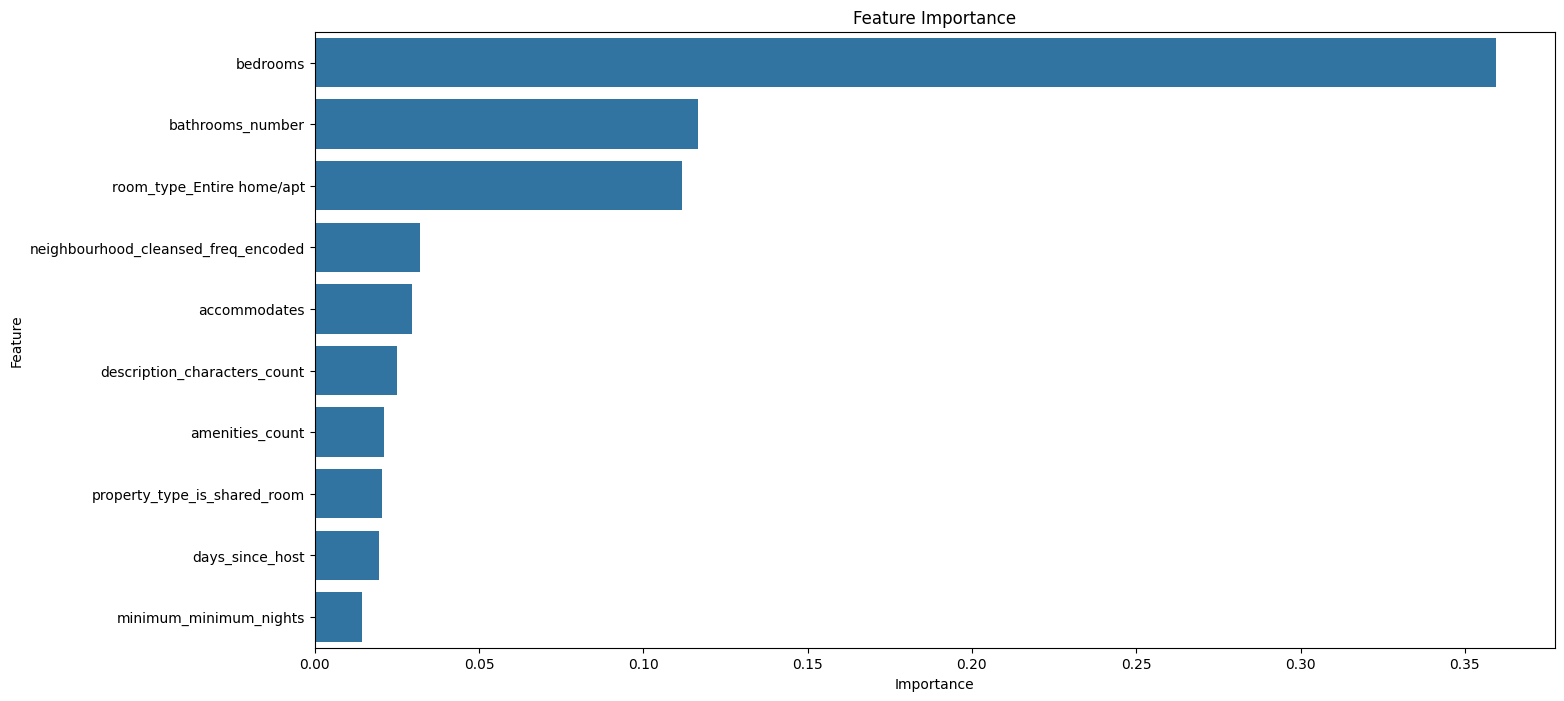

In [ ]:
# prompt: feature_importance_df plot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming feature_importance_df is already created as in the provided code

plt.figure(figsize=(16, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# prompt: select only top 10 feature importance list and create X_train_top10,Xtest_top10

# Assuming feature_importance_df and X_train, X_test are already defined as in the provided code

# Select the top 10 features
top_10_features = feature_importance_df['Feature'].head(10).tolist()

top_10_features

['bedrooms',
 'bathrooms_number',
 'room_type_Entire home/apt',
 'neighbourhood_cleansed_freq_encoded',
 'accommodates',
 'description_characters_count',
 'amenities_count',
 'property_type_is_shared_room',
 'days_since_host',
 'minimum_minimum_nights']

In [ ]:
# prompt: Create new training and testing sets with only the top 10 features

# Create new training and testing sets with only the top 10 features
X_train_top10 = X_train[:, [list(X.columns).index(feature) for feature in top_10_features]]
X_test_top10 = X_test[:, [list(X.columns).index(feature) for feature in top_10_features]]

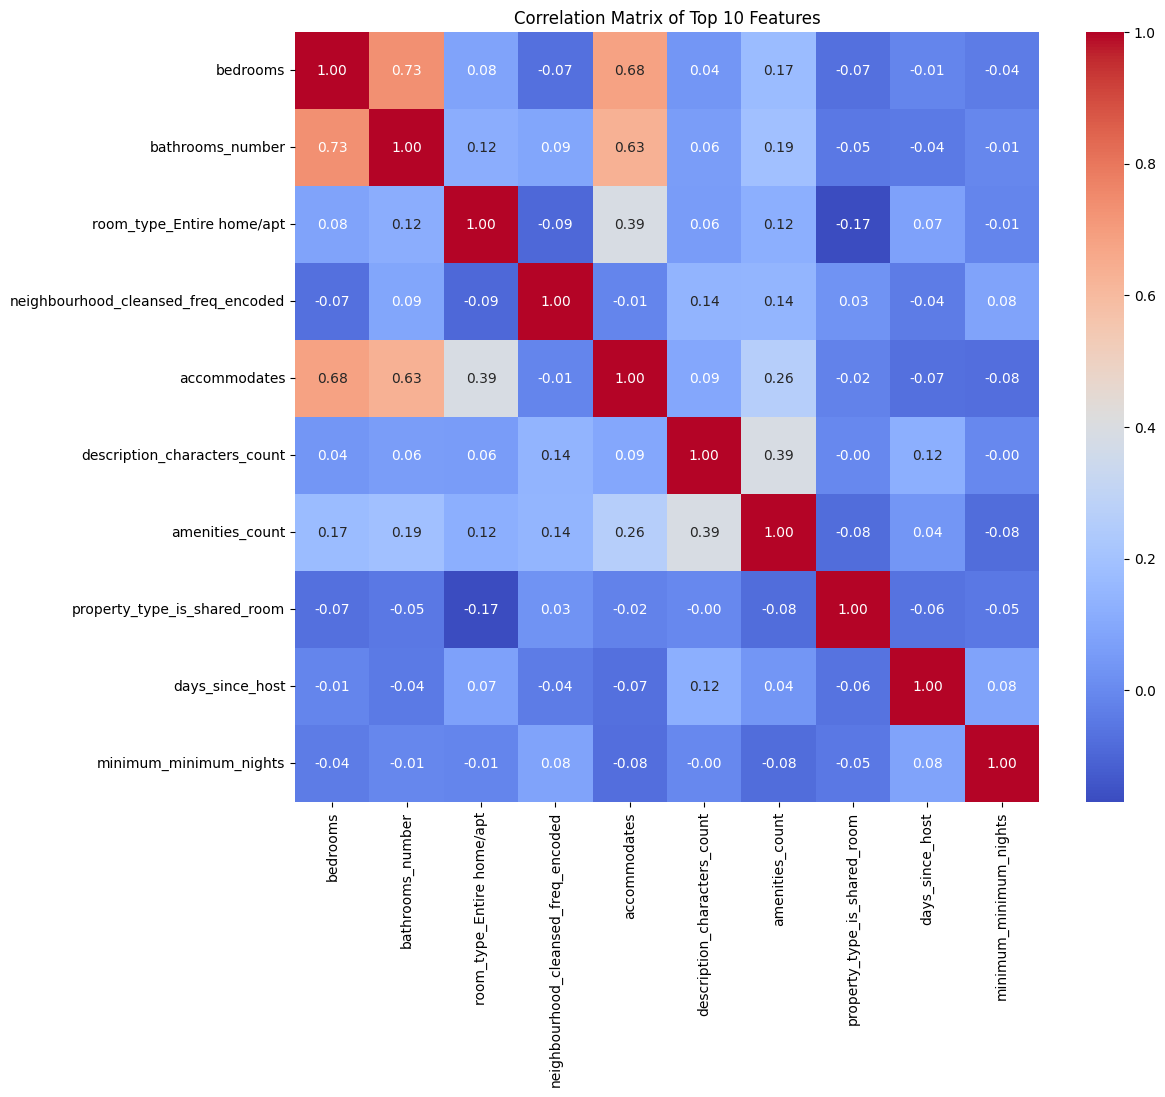

In [ ]:
# prompt: df1 corr plot  replace col name with top_10_features

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_top10 and top_10_features are already defined as in the provided code

# Create a DataFrame from X_train_top10 with the correct column names
df_top10 = pd.DataFrame(X_train_top10, columns=top_10_features)

plt.figure(figsize=(12, 10))
sns.heatmap(df_top10.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top 10 Features')
plt.show()

In [ ]:
# prompt: using X_train_top10 as feature-selected dataset,and X_train as fullsize dataset ,compare the model result using randomforest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train a RandomForestRegressor with the full dataset
rf_full = RandomForestRegressor(random_state=42) # You can adjust hyperparameters
rf_full.fit(X_train, y_train.ravel())  # Ravel y_train to make it 1D

# Make predictions on the test set
y_pred_full = rf_full.predict(X_test)

# Evaluate the model
mse_full = mean_squared_error(y_test, y_pred_full)
r2_full = r2_score(y_test, y_pred_full)

# print("Random Forest (Full Dataset):")
# print(f"Mean Squared Error: {mse_full}")
# print(f"R-squared: {r2_full}")


# Initialize and train a RandomForestRegressor with the top 10 features
rf_top10 = RandomForestRegressor(random_state=42) # You can adjust hyperparameters
rf_top10.fit(X_train_top10, y_train.ravel())

# Make predictions on the test set
y_pred_top10 = rf_top10.predict(X_test_top10)

# Evaluate the model
mse_top10 = mean_squared_error(y_test, y_pred_top10)
r2_top10 = r2_score(y_test, y_pred_top10)

# print("\nRandom Forest (Top 10 Features):")
# print(f"Mean Squared Error: {mse_top10}")
# print(f"R-squared: {r2_top10}")

In [ ]:
# prompt: # prompt: using X_train_top10 as feature-selected dataset,and X_train as fullsize dataset,and X_manual_selected as manual selected dataset ,compare the model result using randomforest

# Initialize and train a RandomForestRegressor with the manual selected features
rf_manual = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters
rf_manual.fit(X_manual_selected, y_train.ravel())

# Make predictions on the test set
y_pred_manual = rf_manual.predict(X_test_manual_selected)

# Evaluate the model
mse_manual = mean_squared_error(y_test, y_pred_manual)
r2_manual = r2_score(y_test, y_pred_manual)

print("\nRandom Forest (Manual Selected Features):")
print(f"Mean Squared Error: {mse_manual}")
print(f"R-squared: {r2_manual}")

print("\nComparison:")
print(f"Full Dataset - MSE: {mse_full}, R-squared: {r2_full}")
print(f"Top 10 Features - MSE: {mse_top10}, R-squared: {r2_top10}")
print(f"Manual Selected Features - MSE: {mse_manual}, R-squared: {r2_manual}")


Random Forest (Manual Selected Features):
Mean Squared Error: 0.340186609116048
R-squared: 0.6413427830166964

Comparison:
Full Dataset - MSE: 0.20701655279050932, R-squared: 0.7817433764184616
Top 10 Features - MSE: 0.24405260397076295, R-squared: 0.7426964336864224
Manual Selected Features - MSE: 0.340186609116048, R-squared: 0.6413427830166964


In [ ]:
X_train = X_train_top10
X_test = X_test_top10

# Regression Modeling


In [ ]:
# prompt: function print calculate root mean square error based on y_pred and 'price($)'

import numpy as np

def calculate_rmse(y_pred, y_true):
  """Calculates the Root Mean Squared Error (RMSE).

  Args:
    y_pred: Predicted values.
    y_true: True values.

  Returns:
    The RMSE value.
  """
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  return rmse

Elastic Net Regression:
Mean Squared Error (MSE): 0.40898731445728764
Root Mean Squared Error (RMSE): 0.6395211602889209
R-squared (R2): 0.5688065077991156
Random Forest Regression:
Mean Squared Error (MSE): 0.24405260397076295
Root Mean Squared Error (RMSE): 0.494016805352574
R-squared (R2): 0.7426964336864224
Decision Tree Regression:
Mean Squared Error (MSE): 0.4786050609653324
Root Mean Squared Error (RMSE): 0.6918128800227215
R-squared (R2): 0.49540882974205014


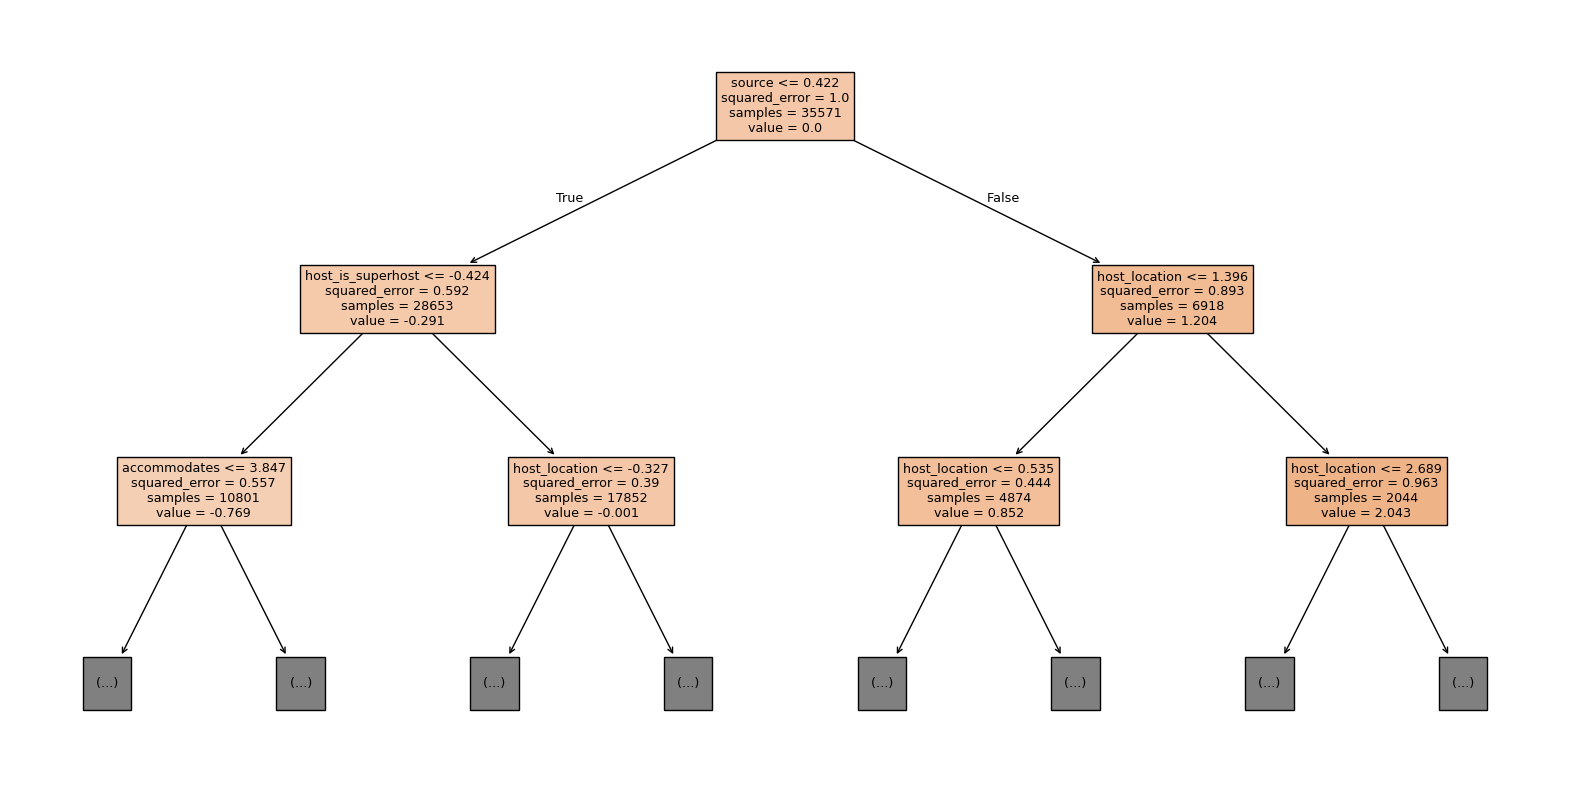

Support Vector Regression:
Mean Squared Error (MSE): 0.31227465616780775
Root Mean Squared Error (RMSE): 0.5588154043759064
R-squared (R2): 0.670770229884747
0:	learn: 0.9436793	test: 0.9183862	best: 0.9183862 (0)	total: 17ms	remaining: 1.68s
99:	learn: 0.5333808	test: 0.5273429	best: 0.5273429 (99)	total: 1.35s	remaining: 0us

bestTest = 0.5273429068
bestIteration = 99

CatBoost Regression:
Mean Squared Error (MSE): 0.27809054300086233
Root Mean Squared Error (RMSE): 0.5273429083631089
R-squared (R2): 0.7068103871541842


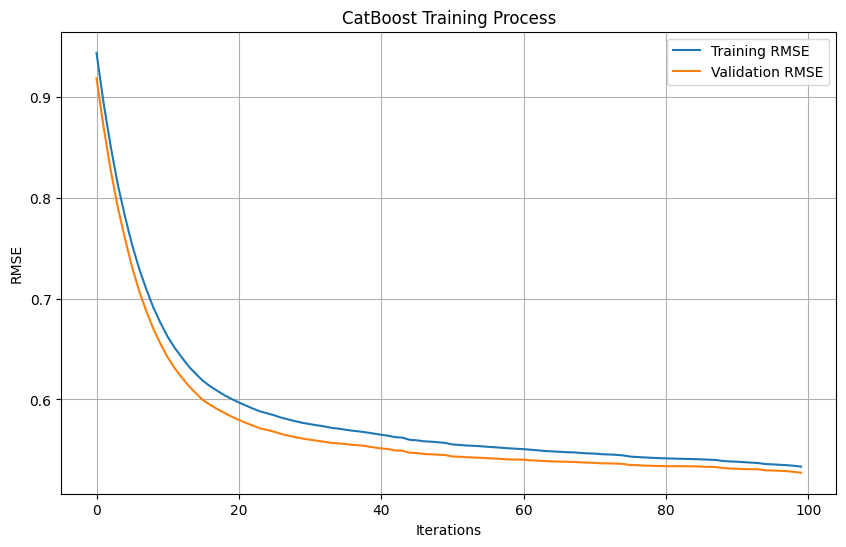

,Model,R2,MSE,RMSE
0,ElasticNet,0.5688,0.4090,0.6395
1,RandomForest,0.7427,0.2441,0.4940
2,DecisionTree,0.4954,0.4786,0.6918
3,SVR,0.6708,0.3123,0.5588
4,CatBoost,0.7068,0.2781,0.5273


In [ ]:
# a)	Multiple Linear Regression
# a.1) Elastic Net
# b)	Random Forest
# c)	Decision Tree
# d)	Support Vector Regression
# e)	CatBoost


from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initialize the Elastic Net model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the model
elastic_net_model.fit(X_train, y_train.ravel())

# Make predictions
y_pred_elastic = elastic_net_model.predict(X_test)

# Evaluate the model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("Elastic Net Regression:")
print(f"Mean Squared Error (MSE): {mse_elastic}")
print(f"Root Mean Squared Error (RMSE): {rmse_elastic}")
print(f"R-squared (R2): {r2_elastic}")

elastic_results = ['ElasticNet', r2_elastic, mse_elastic, rmse_elastic]



from sklearn.ensemble import RandomForestRegressor

# Initialize and train a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R2): {r2_rf}")

rf_results = ['RandomForest', r2_rf, mse_rf, rmse_rf]



from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Initialize the decision tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit (train) the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"R-squared (R2): {r2_dt}")

dt_results = ['DecisionTree', r2_dt, mse_dt, rmse_dt]

# Visualize the tree (optional, but included as requested)
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=list(X.columns), max_depth=2) # Limit depth for readability
plt.show()



from sklearn.svm import SVR

# Initialize the Support Vector Regression model
svr_model = SVR()

# Fit (train) the model
svr_model.fit(X_train, y_train.ravel())

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression:")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R-squared (R2): {r2_svr}")

svr_results = ['SVR', r2_svr, mse_svr, rmse_svr]

!pip install catboost

from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt

# Initialize the CatBoostRegressor model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE', random_seed=42, verbose=100)

# Create a Pool object for the validation set
eval_pool = Pool(X_test, y_test)

# Fit (train) the model
catboost_model.fit(X_train, y_train.ravel(), eval_set=eval_pool)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost Regression:")
print(f"Mean Squared Error (MSE): {mse_catboost}")
print(f"Root Mean Squared Error (RMSE): {rmse_catboost}")
print(f"R-squared (R2): {r2_catboost}")

catboost_results = ['CatBoost', r2_catboost, mse_catboost, rmse_catboost]

# Plot training and validation loss
history = catboost_model.get_evals_result()
plt.figure(figsize=(10, 6))
plt.plot(history['learn']['RMSE'], label='Training RMSE')
plt.plot(history['validation']['RMSE'], label='Validation RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('CatBoost Training Process')
plt.legend()
plt.grid(True)
plt.show()



results_df = pd.DataFrame([elastic_results, rf_results, dt_results, svr_results, catboost_results], columns=['Model', 'R2', 'MSE', 'RMSE'])
results_df

In [ ]:
catboost_model

# Hyperpermeter tuning

In [ ]:
# prompt: gridsearch catboost

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for CatBoostRegressor
param_grid = {
    'iterations': [100,250,400],  # Adjust the number of iterations
    'learning_rate': [0.3,0.2,0.1],  # Experiment with different learning rates
    'l2_leaf_reg': [1, 3, 5] #Regularization
}


# Initialize the CatBoostRegressor model
model = catboost_model


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")


# Make predictions using the best model
y_pred = best_model.predict(X_test)


# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"CatBoost Regression (GridSearchCV) - Root Mean Squared Error (RMSE): {rmse}")
print(f"CatBoost Regression (GridSearchCV) - R-squared (R2): {r2}")

0:	learn: 0.8402692	total: 8.57ms	remaining: 3.42s
100:	learn: 0.4899313	total: 538ms	remaining: 1.59s
200:	learn: 0.4581082	total: 1.06s	remaining: 1.05s
300:	learn: 0.4367029	total: 1.59s	remaining: 522ms
399:	learn: 0.4199350	total: 2.12s	remaining: 0us
Best Hyperparameters: {'iterations': 400, 'l2_leaf_reg': 3, 'learning_rate': 0.3}
CatBoost Regression (GridSearchCV) - Root Mean Squared Error (RMSE): 0.4802837121990681
CatBoost Regression (GridSearchCV) - R-squared (R2): 0.7568030761474827


# Cross Validation

In [ ]:
# prompt: 5 fold cross validation catboost with best peremater

from sklearn.model_selection import KFold

# Assuming X and y are your features and target variable
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the CatBoostRegressor with the best parameters found in GridSearchCV
    best_catboost_model = CatBoostRegressor(**best_params, random_seed=42, verbose=0)  # Use best parameters
    best_catboost_model.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_pred_fold = best_catboost_model.predict(X_test_fold)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))
    r2 = r2_score(y_test_fold, y_pred_fold)

    rmse_scores.append(rmse)
    r2_scores.append(r2)

print("5-Fold Cross Validation Results:")
print("RMSE Scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("R-squared Scores:", r2_scores)
print("Mean R-squared:", np.mean(r2_scores))

5-Fold Cross Validation Results:
RMSE Scores: [0.37438521535061675, 0.3867058543562513, 0.38080635887610453, 0.38307982254648737, 0.39742235100819173]
Mean RMSE: 0.3844799204275303
R-squared Scores: [0.8119313734745383, 0.8083028301590949, 0.8169545673796419, 0.8095997935188037, 0.8024764896188127]
Mean R-squared: 0.8098530108301782


# 3.	Results and Report

predict the price for a 3-bedroom, 2-bathroom, instant bookable, Entire home/apt listing that accommodates 5

In [ ]:
# prompt: set value in X_one data 3-bedroom, 2-bathroom accommodates 5

# Create a new DataFrame with a single row and the correct column names
X_one_data = pd.DataFrame(columns=top_10_features)

# Set the values for the specified features
X_one_data.loc[0, 'bedrooms'] = 3
X_one_data.loc[0, 'bathrooms_number'] = 2
X_one_data.loc[0, 'accommodates'] = 5

# Fill other columns with the mean values from the training data.
for column in X_one_data.columns:
    if pd.isna(X_one_data.loc[0,column]):
        X_one_data.loc[0, column] = X_train_top10.mean(axis=0)[list(top_10_features).index(column)]

# Convert the DataFrame to a NumPy array
X_one_array = X_one_data.values
X_one_data

,bedrooms,bathrooms_number,room_type_Entire home/apt,neighbourhood_cleansed_freq_encoded,accommodates,description_characters_count,amenities_count,property_type_is_shared_room,days_since_host,minimum_minimum_nights
0,3,2,-0.0000,-0.0000,5,0.0000,-0.0000,-0.0000,0.0000,0.0000


In [ ]:
y_one_pred = best_model.predict(X_one_array)
y_one_pred = scaler_y.inverse_transform(y_one_pred.reshape(-1, 1))
y_one_pred = np.expm1(y_one_pred)
y_one_pred

array([[1157.05145131]])